# Hypothesis Testing 

### Null Hypothesis (H0)
- To check whether claim is applicable or not 
- States that there is no significant difference between a set of a variable 
- in simple words everything is same or equal

### Alternate Hypothesis (H1 / Ha)
- to challenge currently accepted state of knowledge
- More precisely states that there is a significant difference between a set of a variable


`Null Hypothesis and Alternate Hypothesis are mutually exclusive`

###  Steps for Hypothesis Testing 

                    Start
                     |
                     v
            State both Hypothesises
                     |
                     v
           Formulate analysis plan 
                     |
                     v
        Analyze data (mean, population, z=score)
                     |
                     v
        Interpret Results (apply decision rules)
                     |
                     V
                    End 

 
- Define Hypothesis H0,Ha
- Select test statistics whose probability distribution function can be found under the Null Hypothesis
- Collect data 
- Compute test statistics and calculate p-value under null hypothesis
- Reject Null Hyppthsis if p-value is lower then predetermined significance value

### Types of tests

- One tailed : Region of rejection is only on one side of sampling distribution
- Two tailed : Region of rejection is on both sides of sampling distribution

### Decision rules 
- p-value
- region of acceptance 

### P Value

- possibility for the `null hypothesis` to be true
- like p-value is the probability of observing another mean value that is at least as extreme as the value found from the sample data.(still not clear to me)


| The P-value interpretation table ||
|-|-|
| Less than 0.01 | strong evidence against Null Hypothesis, very statistically significant |
| 0.01 to 0.05 | Some evidence against Null Hypothesis, statistically significant | 
| Greater than 0.05 | Insufficient evidence against Null Hypothesis | 


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [51]:
mu = 50
sigma = 15
number_of_records = 10000
observe_data = [30,85]

significance_level = 0.05
data = np.random.normal(loc=mu,scale=sigma,size=(number_of_records,))

## sort the array and get 0.025 % data indeces from both of the sides
## it will give the boundry for 0.05 % population
sorted_data = np.sort(data)
significance_index = int((p_value/2)*number_of_records)

left_bound = sorted_data[0]
left_side = sorted_data[significance_index]
right_side = sorted_data[(number_of_records-1)-significance_index]
right_bound = sorted_data[number_of_records-1]

<ipython-input-52-2b25423ed9f7>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


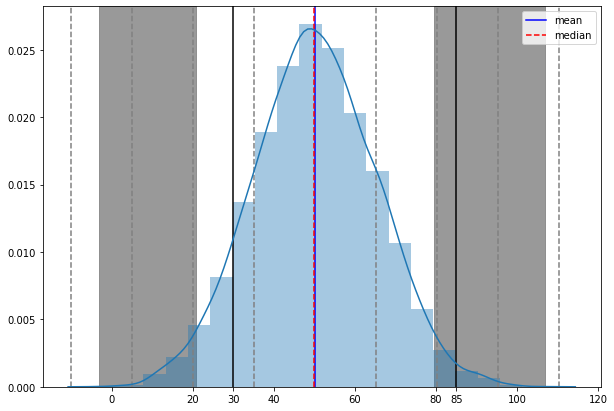

In [52]:
    
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)

mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)

for i in range(1,5):
    ax.axvline(mean+i*std_dev,c='grey',ls="--")
    ax.axvline(mean-i*std_dev,c='grey',ls="--")


for od in observe_data: 
    ax.axvline(od,c='black',lw=1.5,fillstyle='left')
    x_ticks = np.append(ax.get_xticks(), od)
    ax.set_xticks(x_ticks)

ax.axvline(mean,label="mean",c='b',lw=1.5)
ax.axvline(median,label="median",c="r",ls="--")

ax.axvspan(left_bound, left_side, alpha=0.8, color='grey')
ax.axvspan(right_side, right_bound, alpha=0.8, color='grey')

sns.distplot(data,bins=20,norm_hist=True)
ax.legend()
fig.show()

- Grey part is showing combined 0.05 % of the data
- blue part is showing rest 95% of the data
- like 30 is in the most population (p > 0.05)(accept null hypothesis)
- 85 is in the grey area , out of significance level (p_value < 0.05) (reject null hypothesis)


### Decision Errors 

| Type 1 Error | Type 2 Error | 
| ------------ | ------------ | 
| Occurs when a researcher rejects a Null Hypothesis when it is true | Fails to reject an Hypothesis when it is false |
| False Positive | False Negative | 
| Significance Level : probability of commiting a Type 1 error | Power Of Test : probability of not commiting a Type 2 error | 
| alpha | beta |

## Test Statistics 

The methods used for performing t-test are shown below.

- stats.ttest_1samp: Tests if the mean of a population is a given value.
- stats.ttest_ind: Tests if the means of two independent samples are equal.
- stats.ttest_rel: Tests if the means of two paired samples are equal.

In [1]:
import numpy as np
from scipy import stats

### Example 
- Normally estimation for mean and variance of sample is made and test statistics is calculated  
- if population variance is identified, it is reasonable to consider that test statisics is normally distributed
- if variance is unknown, sample variance is used and test statistics follows t distribution

In [2]:
np.random.seed(10)
mu, sigma = 0.8, 0.5
significanceLevel = 0.05 ## 5%

H0 = '''H0 : mean of the population is 1.0'''

normDist = stats.norm(mu,sigma)

## Derive a sample 
n = 100
sample = normDist.rvs(n)

## compute test statistics 
t, p = stats.ttest_1samp(sample , 1.0)

print(H0)
print(f"""
p-value : {p}
t-score : {t}
""")

if p < significanceLevel:
    print("H0 is rejected.")
else:
    print("H0 is accepted.")

H0 : mean of the population is 1.0

p-value : 0.0013513182796454544
t-score : -3.2984836759256875

H0 is rejected.


In [3]:
mu1, sigma1 = 0.25, 1.0
mu2, sigma2 = 0.50, 1.0

significanceLevel = 0.05 ## 5%

H0 = '''H0 : population means of two random variables are equal'''

normDist1 = stats.norm(mu1,sigma1)
normDist2 = stats.norm(mu2,sigma2)

## Sample
n = 100
sample1 = normDist1.rvs(n)
sample2 = normDist2.rvs(n)

## compute test statistics 
t, p = stats.ttest_ind(sample1,sample2)

print(H0)
print(f"""
p-value : {p}
t-score : {t}
""")

if p < significanceLevel:
    print("H0 is rejected.")
else:
    print("H0 is accepted.")

H0 : population means of two random variables are equal

p-value : 0.24665844967219017
t-score : -1.1619402232350682

H0 is accepted.


In [4]:
mu1, sigma1 = 0.25, 1.0
mu2, sigma2 = 0.50, 1.0

significanceLevel = 0.05 ## 5%

H0 = '''H0 : population means of two paired samples are equal'''

normDist1 = stats.norm(mu1,sigma1)
normDist2 = stats.norm(mu2,sigma2)

## Sample
n = 100
sample1 = normDist1.rvs(n)
sample2 = normDist2.rvs(n)

## compute test statistics 
t, p = stats.ttest_rel(sample1,sample2)

print(H0)
print(f"""
p-value : {p}
t-score : {t}
""")

if p < significanceLevel:
    print("H0 is rejected.")
else:
    print("H0 is accepted.")

H0 : population means of two paired samples are equal

p-value : 0.3444019855090813
t-score : -0.950046874746579

H0 is accepted.
